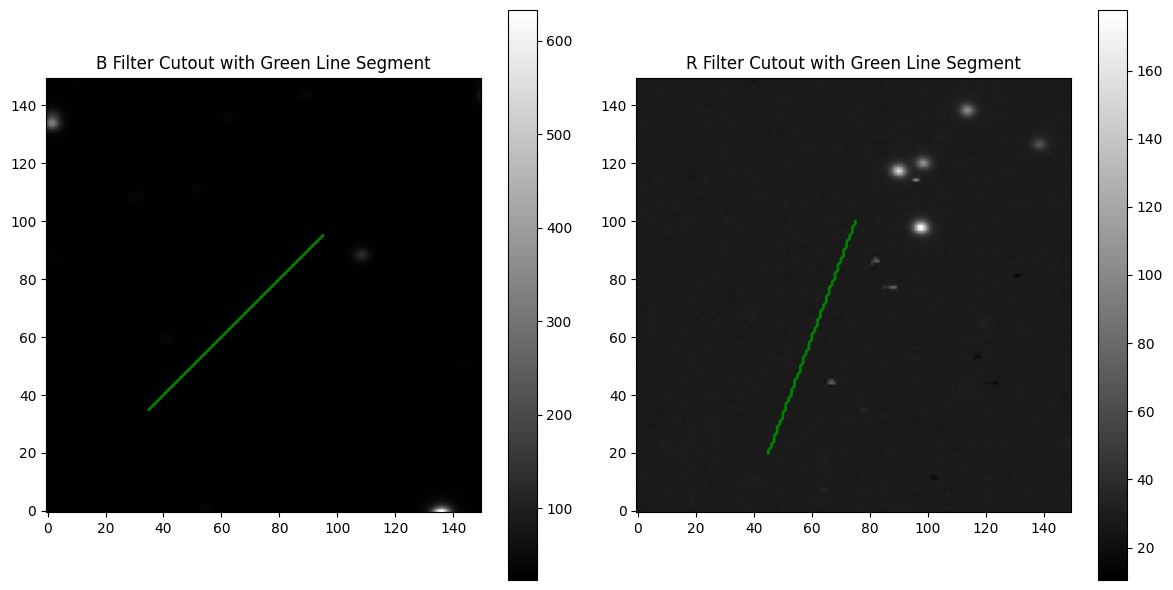

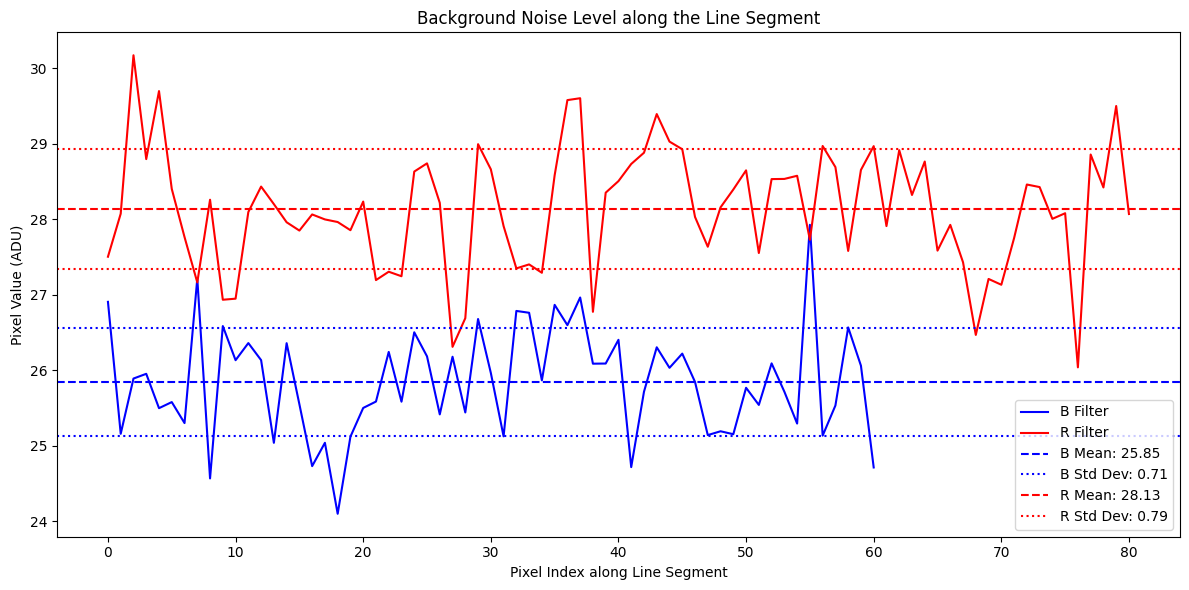

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.nddata import Cutout2D
from skimage.draw import line

# Load the B and R filter images
image_b_data = fits.getdata('m2/Light_B.fits')
image_r_data = fits.getdata('m2/Light_R.fits')

# Calculate the center of the B image for the cutout
center_position_b = (image_b_data.shape[0] // 2, image_b_data.shape[1] // 2)

# Choose a different position for the R image cutout
center_position_r = (image_r_data.shape[0] // 4, image_r_data.shape[1] // 4) 

# Select the region for the cutout (example: a 150x150 pixel cutout)
cutout_size = (150, 150)

# Create cutouts centered at the calculated positions
cutout_b = Cutout2D(image_b_data, center_position_b, cutout_size)
cutout_r = Cutout2D(image_r_data, center_position_r, cutout_size)

# Define a random green line segment on the B filter cutout
start_b = (35, 35)
end_b = (95, 95)
rr_b, cc_b = line(start_b[0], start_b[1], end_b[0], end_b[1])

# Ensure the line coordinates are within the cutout bounds for B filter
valid_b = (rr_b >= 0) & (rr_b < cutout_size[0]) & (cc_b >= 0) & (cc_b < cutout_size[1])
rr_b, cc_b = rr_b[valid_b], cc_b[valid_b]

# Define a different random green line segment on the R filter cutout
start_r = (20, 45)
end_r = (100, 75)
rr_r, cc_r = line(start_r[0], start_r[1], end_r[0], end_r[1])

# Ensure the line coordinates are within the cutout bounds for R filter
valid_r = (rr_r >= 0) & (rr_r < cutout_size[0]) & (cc_r >= 0) & (cc_r < cutout_size[1])
rr_r, cc_r = rr_r[valid_r], cc_r[valid_r]

# Plot the cutouts with the green line segments
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

img1 = ax1.imshow(cutout_b.data, cmap='gray', origin='lower')
ax1.plot(cc_b, rr_b, color='green', linestyle='-', linewidth=2)
ax1.set_title('B Filter Cutout with Green Line Segment')
fig.colorbar(img1, ax=ax1)

img2 = ax2.imshow(cutout_r.data, cmap='gray', origin='lower')
ax2.plot(cc_r, rr_r, color='green', linestyle='-', linewidth=2)
ax2.set_title('R Filter Cutout with Green Line Segment')
fig.colorbar(img2, ax=ax2)

plt.tight_layout()
plt.show()

# Extract pixel values along the line segment for both filters
pixel_values_b = cutout_b.data[rr_b, cc_b]
pixel_values_r = cutout_r.data[rr_r, cc_r]

# Calculate mean and standard deviation for both filters
mean_b = np.mean(pixel_values_b)
std_b = np.std(pixel_values_b)
mean_r = np.mean(pixel_values_r)
std_r = np.std(pixel_values_r)

# Plot the pixel values to show the background noise level
plt.figure(figsize=(12, 6))
plt.plot(pixel_values_b, color='blue', label='B Filter')
plt.plot(pixel_values_r, color='red', label='R Filter')
plt.axhline(y=mean_b, color='blue', linestyle='--', label=f'B Mean: {mean_b:.2f}')
plt.axhline(y=mean_b + std_b, color='blue', linestyle=':', label=f'B Std Dev: {std_b:.2f}')
plt.axhline(y=mean_b - std_b, color='blue', linestyle=':')
plt.axhline(y=mean_r, color='red', linestyle='--', label=f'R Mean: {mean_r:.2f}')
plt.axhline(y=mean_r + std_r, color='red', linestyle=':', label=f'R Std Dev: {std_r:.2f}')
plt.axhline(y=mean_r - std_r, color='red', linestyle=':')
plt.title('Background Noise Level along the Line Segment')
plt.xlabel('Pixel Index along Line Segment')
plt.ylabel('Pixel Value (ADU)')
plt.legend()

plt.tight_layout()
plt.show()
